In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage import io
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from tabulate import tabulate

In [188]:
def rbg_to_gray(img):
    copy = np.dot(img[:,:,:], [0.2989, 0.5870, 0.1140])
    return copy.astype(np.uint8)

def plot_lbp(img_vec):
    f, axarr = plt.subplots(1, len(img_vec), figsize = (12,12))
    for i in range(len(img_vec)):
        axarr[i].imshow(img_vec[i], cmap='gray')
        axarr[i].set_title('Textura ' + str(i + 1))
        axarr[i].axis('off')
    plt.show()

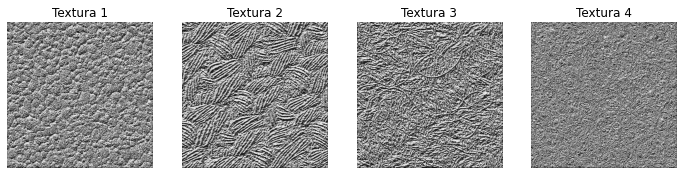

In [189]:
 img_vec = []
 for i in range(4):
    img_name = 'textura' + str(i + 1) + '.png'
    img = io.imread('in/' + img_name)

    if img is None:
        sys.exit("Could not read the image.")

    img = rbg_to_gray(img)

    P = 8
    R = 1
    lbp = local_binary_pattern(img, P, R)

    img_vec.append(lbp)

plot_lbp(img_vec)

In [190]:
def plot_histogram(img_vec, show_original=False):
    histograms = []
    if show_original:
        f, axarr = plt.subplots(2, len(img_vec), figsize = (10,10))
        for i in range(len(img_vec)):
            width, height = img_vec[i].shape
            lbp = local_binary_pattern(img_vec[i], 8, 1)
            hist, edges = np.histogram(lbp.ravel(), 256)
            hist = hist/(width * height)
            histograms.append(hist.astype(np.float32))
            plt.tight_layout()
            axarr[1][i].plot(hist)
            axarr[0][i].imshow(img_vec[i], cmap='gray')
            axarr[0][i].axis('off')
            axarr[0][i].set_title('Textura ' + str(i + 1))
    else:
        f, axarr = plt.subplots(1, len(img_vec), figsize = (12,2))
        for i in range(len(img_vec)):
            width, height = img_vec[i].shape
            lbp = local_binary_pattern(img_vec[i], 8, 1)
            hist, edges = np.histogram(lbp.ravel(), 256)
            hist = hist/(width * height)
            histograms.append(hist.astype(np.float32))
            plt.tight_layout()
            axarr[i].plot(hist)
            axarr[i].set_title('Textura ' + str(i + 1))
    plt.show()
    return histograms

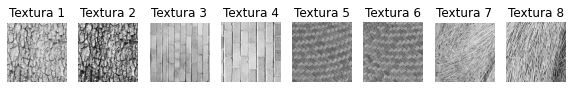

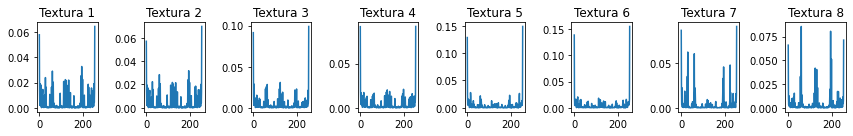

In [191]:
img_vec = []
img_name = 'casca1' + '.png'
img = io.imread('in/' + img_name)
img_vec.append(img)

img_name = 'casca2' + '.png'
img = io.imread('in/' + img_name)
img_vec.append(img)

img_name = 'tijolo1' + '.png'
img = io.imread('in/' + img_name)
img_vec.append(img)

img_name = 'tijolo2' + '.png'
img = io.imread('in/' + img_name)
img_vec.append(img)

img_name = 'fabric1' + '.png'
img = io.imread('in/' + img_name)
img_vec.append(rbg_to_gray(img))

img_name = 'fabric2' + '.png'
img = io.imread('in/' + img_name)
img_vec.append(rbg_to_gray(img))

img_name = 'palha1' + '.png'
img = io.imread('in/' + img_name)
img_vec.append(img)

img_name = 'palha2' + '.png'
img = io.imread('in/' + img_name)
img_vec.append(img)

n = len(img_vec)
f, axarr = plt.subplots(1, n, figsize = (10,10))
for i in range(n):
    axarr[i].imshow(img_vec[i], cmap='gray')
    axarr[i].set_title('Textura ' + str(i + 1))
    axarr[i].axis('off')
plt.show()  

histograms = plot_histogram(img_vec)

In [192]:
def compare_histograms(histograms):
    n = len(histograms)
    if n == 1:
        return -1
    chi_matrix = np.zeros((n, n))
    cor_matrix = np.ones((n, n))
    for i in range(1, n):
        for j in range(0, n - 1):
            chi = np.sum((histograms[i] - histograms[j])**2)/(np.sum(histograms[i] + histograms[j]))
            chi_matrix[i][j] = chi
            chi_matrix[j][i] = chi

            cor = cv2.compareHist(histograms[i], histograms[j], 0)
            cor_matrix[i][j] = cor
            cor_matrix[j][i] = cor

    return chi_matrix, cor_matrix

def show_matrix(matrix, title=''):
    copy = matrix.copy().tolist()
    header = [title]
    for i in range(matrix.shape[0]):
        header.append('Textura ' + str(i + 1))
        copy[i].insert(0, 'Textura ' + str(i + 1))
    print(tabulate(copy, headers=header, floatfmt=".5f"))

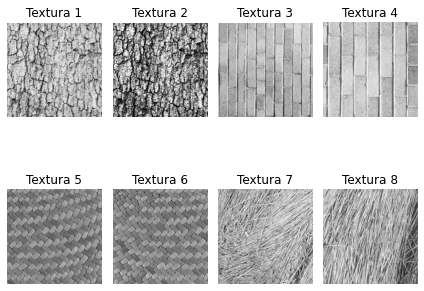

Qui quad      Textura 1    Textura 2    Textura 3    Textura 4    Textura 5    Textura 6    Textura 7    Textura 8
----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------
Textura 1       0.00000      0.00003      0.00209      0.00167      0.00806      0.00944      0.00457      0.00493
Textura 2       0.00003      0.00000      0.00192      0.00151      0.00762      0.00898      0.00451      0.00501
Textura 3       0.00209      0.00192      0.00000      0.00063      0.00403      0.00475      0.00542      0.00602
Textura 4       0.00167      0.00151      0.00063      0.00000      0.00353      0.00415      0.00537      0.00702
Textura 5       0.00806      0.00762      0.00403      0.00353      0.00000      0.00063      0.00733      0.01296
Textura 6       0.00944      0.00898      0.00475      0.00415      0.00063      0.00000      0.00827      0.01555
Textura 7       0.00457      0.00451      0.00542      0.00537      0.00733     

In [193]:
n = len(histograms)

f, axarr = plt.subplots(2, int(n/2), figsize = (6,6))
for i in range(int(n/2)):
    axarr[0][i].imshow(img_vec[i], cmap='gray')
    axarr[0][i].set_title('Textura ' + str(i + 1))
    axarr[0][i].axis('off')
    axarr[1][i].imshow(img_vec[i + int(n/2)], cmap='gray')
    axarr[1][i].set_title('Textura ' + str(i + int(n/2) + 1))
    axarr[1][i].axis('off')
    f.tight_layout()
plt.show()  

chi_matrix, cor_matrix = compare_histograms(histograms)
show_matrix(chi_matrix, 'Qui quad')
print()
show_matrix(cor_matrix, 'Correlação')

In [282]:
def generate_glcm(img_vec, dist, angles):
    glcm_vec = []
    n = len(img_vec)
    for i in range(n):
        glcm = greycomatrix(img_vec[i], dist, angles, normed=True, symmetric=False)
        glcm_vec.append(glcm)
    return glcm_vec

def glcm_prop(glcm_vec):
    n = len(glcm_vec)
    correlation = []
    energy = []
    contrast = []
    homogeneity = []
    for i in range(n):
        correlation.append(greycoprops(glcm_vec[i], prop='correlation'))
        energy.append(greycoprops(glcm_vec[i], prop='energy'))
        contrast.append(greycoprops(glcm_vec[i], prop='contrast'))
        homogeneity.append(greycoprops(glcm_vec[i], prop='homogeneity'))

    header = ['GLCM', 'Correlação', 'Energia', 'Homogeneidade', 'Contraste']
    copy = np.concatenate((correlation, energy, homogeneity, contrast), axis=1)
    copy = np.reshape(copy, (n,4))
    copy = copy.tolist()
    for i in range(n):
        copy[i].insert(0, 'Textura ' + str(i + 1))
 
    print(tabulate(copy, headers=header, floatfmt=".5f"))

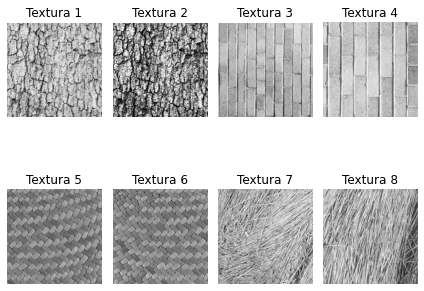

GLCM         Correlação    Energia    Homogeneidade    Contraste
---------  ------------  ---------  ---------------  -----------
Textura 1       0.85416    0.01132          0.06712    621.12515
Textura 2       0.83954    0.01207          0.05385   1750.10010
Textura 3       0.78088    0.01615          0.08693    420.09698
Textura 4       0.89747    0.01919          0.10866    177.95040
Textura 5       0.69453    0.01980          0.11596    471.93302
Textura 6       0.68775    0.01864          0.10494    538.15557
Textura 7       0.73928    0.01069          0.05799    738.79129
Textura 8       0.91771    0.01150          0.07668    283.68242


In [284]:
f, axarr = plt.subplots(2, int(n/2), figsize = (6,6))
for i in range(int(n/2)):
    axarr[0][i].imshow(img_vec[i], cmap='gray')
    axarr[0][i].set_title('Textura ' + str(i + 1))
    axarr[0][i].axis('off')
    axarr[1][i].imshow(img_vec[i + int(n/2)], cmap='gray')
    axarr[1][i].set_title('Textura ' + str(i + int(n/2) + 1))
    axarr[1][i].axis('off')
    f.tight_layout()
plt.show()  

glcm_vec = generate_glcm(img_vec, [1], [0])
glcm_prop(glcm_vec)